In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics

In [2]:
warnings.filterwarnings("ignore")

# Importing Data Files

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Exploratory Data Anbalysis

In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,335098,0,4,1,8,1,0,0,0,0,...,10,0,3,7,0,0,0,0,0,0
1,1353173,1,4,2,6,1,0,0,0,1,...,6,0,2,9,1,0,0,0,1,0
2,1446937,0,5,1,7,0,0,1,0,0,...,6,0,2,11,0,1,0,0,0,0
3,667154,0,3,3,5,0,0,0,1,0,...,3,1,3,6,0,0,1,0,0,0
4,859097,0,2,2,2,1,0,1,0,0,...,5,3,4,7,0,0,1,0,0,0


In [5]:
train.shape

(416648, 59)

In [6]:
test.shape

(178564, 58)

#### We are given that the missing values are indicated by -1. Lets replace -1 with NaN so that we can compute how many missing values are present.

In [7]:
train_data = train # Make a copy just to be on the safe side
train_data = train_data.replace(-1, np.NaN)

In [8]:
test_data = test
test_data = test_data.replace(-1,np.NaN)

Let's check if there are any duplicate values present or not.

In [9]:
train_data.shape

(416648, 59)

In [10]:
train_data.drop_duplicates()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,335098,0,4,1.0,8,1.0,0.0,0,0,0,...,10,0,3,7,0,0,0,0,0,0
1,1353173,1,4,2.0,6,1.0,0.0,0,0,1,...,6,0,2,9,1,0,0,0,1,0
2,1446937,0,5,1.0,7,0.0,0.0,1,0,0,...,6,0,2,11,0,1,0,0,0,0
3,667154,0,3,3.0,5,0.0,0.0,0,1,0,...,3,1,3,6,0,0,1,0,0,0
4,859097,0,2,2.0,2,1.0,0.0,1,0,0,...,5,3,4,7,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416643,1284485,0,1,1.0,6,0.0,0.0,0,0,1,...,5,0,5,5,0,1,1,1,0,0
416644,693780,0,0,2.0,3,1.0,0.0,1,0,0,...,4,0,4,6,0,0,1,0,1,0
416645,1398567,0,3,1.0,3,0.0,0.0,0,1,0,...,9,0,5,6,0,1,1,1,1,0
416646,886369,0,2,1.0,5,1.0,0.0,0,0,1,...,5,4,1,6,0,0,1,0,1,0


In [11]:
train_data.shape

(416648, 59)

No duplicate Data is present in the dataset.

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416648 entries, 0 to 416647
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              416648 non-null  int64  
 1   target          416648 non-null  int64  
 2   ps_ind_01       416648 non-null  int64  
 3   ps_ind_02_cat   416500 non-null  float64
 4   ps_ind_03       416648 non-null  int64  
 5   ps_ind_04_cat   416593 non-null  float64
 6   ps_ind_05_cat   412601 non-null  float64
 7   ps_ind_06_bin   416648 non-null  int64  
 8   ps_ind_07_bin   416648 non-null  int64  
 9   ps_ind_08_bin   416648 non-null  int64  
 10  ps_ind_09_bin   416648 non-null  int64  
 11  ps_ind_10_bin   416648 non-null  int64  
 12  ps_ind_11_bin   416648 non-null  int64  
 13  ps_ind_12_bin   416648 non-null  int64  
 14  ps_ind_13_bin   416648 non-null  int64  
 15  ps_ind_14       416648 non-null  int64  
 16  ps_ind_15       416648 non-null  int64  
 17  ps_ind_16_

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178564 entries, 0 to 178563
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              178564 non-null  int64  
 1   ps_ind_01       178564 non-null  int64  
 2   ps_ind_02_cat   178496 non-null  float64
 3   ps_ind_03       178564 non-null  int64  
 4   ps_ind_04_cat   178536 non-null  float64
 5   ps_ind_05_cat   176802 non-null  float64
 6   ps_ind_06_bin   178564 non-null  int64  
 7   ps_ind_07_bin   178564 non-null  int64  
 8   ps_ind_08_bin   178564 non-null  int64  
 9   ps_ind_09_bin   178564 non-null  int64  
 10  ps_ind_10_bin   178564 non-null  int64  
 11  ps_ind_11_bin   178564 non-null  int64  
 12  ps_ind_12_bin   178564 non-null  int64  
 13  ps_ind_13_bin   178564 non-null  int64  
 14  ps_ind_14       178564 non-null  int64  
 15  ps_ind_15       178564 non-null  int64  
 16  ps_ind_16_bin   178564 non-null  int64  
 17  ps_ind_17_

Both our training data and test data have only numeric values. The features have been named such as ending with 'bin' indicating binary data, 'cat' indicating categorical data.

### Types of features in the dataset

In [14]:
def get_info(train_data):
    data = []
    for col in train_data.columns:
        # Defining the role
        if col == 'target':
            role = 'target'
        elif col == 'id':
            role = 'id'
        else:
            role = 'input'

        # Defining the level
        if 'bin' in col or col == 'target':
            level = 'binary'
        elif 'cat' in col or col == 'id':
            level = 'nominal'
        elif train[col].dtype == np.float64:
            level = 'interval'
        elif train[col].dtype == np.int64:
            level = 'ordinal'

       # Defining the data type 
        dtype = train[col].dtype

        # Creating a Dict that contains all the metadata for the variable
        col_dict = {
            'varname': col,
            'role'   : role,
            'level'  : level,
            'dtype'  : dtype
        }
        data.append(col_dict)
    meta = pd.DataFrame(data, columns=['varname', 'role', 'level',  'dtype'])
    meta.set_index('varname', inplace=True)
    return meta

In [15]:
info = get_info(train)

In [16]:
info_counts = info\
                    .groupby(['role','level'])\
                        .agg({'dtype': lambda x: x.count()})\
                            .reset_index()
display(info_counts)

,role,level,dtype
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


[Text(0.5, 0, 'Variable Type'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Variables Count Across Datatype')]

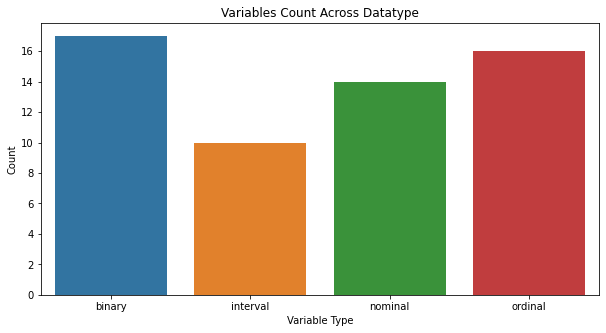

In [17]:
fig,ax = plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(data=info_counts[(info_counts.role != 'target') & (info_counts.role != 'id') ],
            x="level",
            y="dtype",
            ax=ax)

ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

The above distribution shows the classification of different data types we have.

### Feature Analysis

In [18]:
col_ordinal   = info[(info.level == 'ordinal') ].index
col_nominal   = info[(info.level == 'nominal') & (info.role != 'id')].index
col_internval = info[(info.level == 'interval')].index
col_binary    = info[(info.level == 'binary') & (info.role != 'target')].index

<AxesSubplot:title={'center':'Pearson correlation of continuous (interval) features'}>

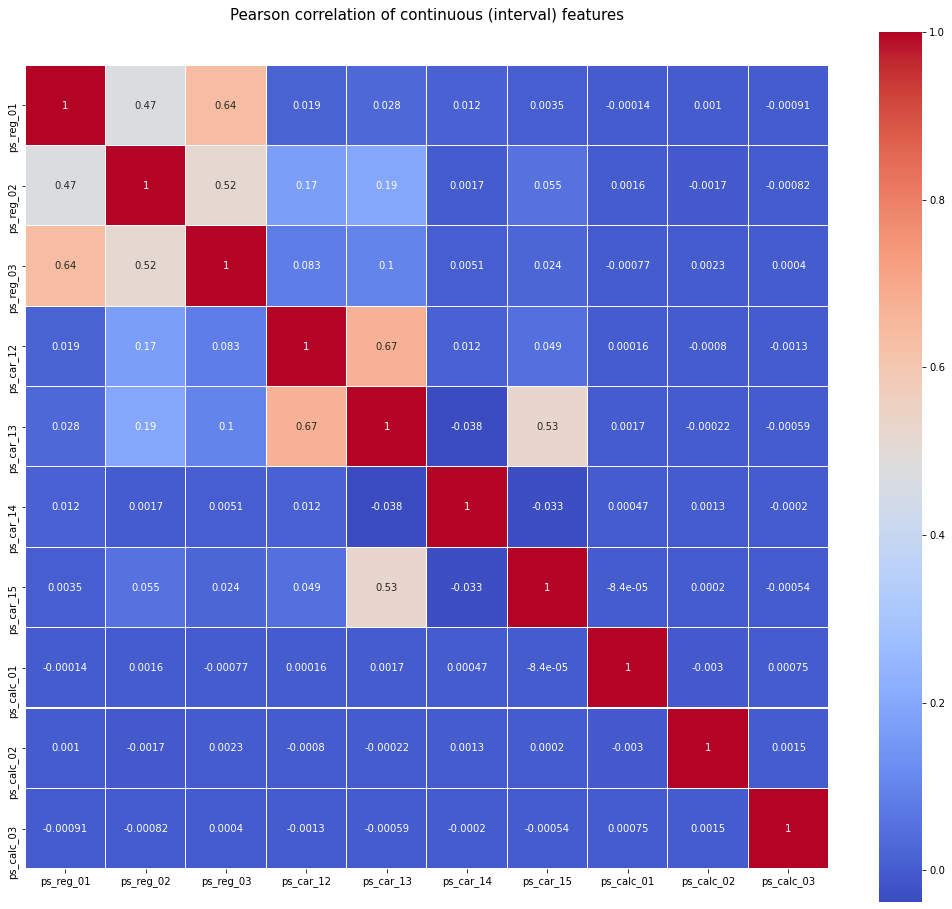

In [19]:
# Visualizing interval/continuous features
plt.figure(figsize=(18,16))
plt.title('Pearson correlation of continuous (interval) features', y=1.05, size=15)
sns.heatmap(train[col_internval].corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            linecolor='white', 
            cmap = "coolwarm",
            annot=True)

In [20]:
# Printing number of categories in each column
for i in col_nominal:
    print (i,len(train_data[i].unique()))

ps_ind_02_cat 5
ps_ind_04_cat 3
ps_ind_05_cat 8
ps_car_01_cat 13
ps_car_02_cat 3
ps_car_03_cat 3
ps_car_04_cat 10
ps_car_05_cat 3
ps_car_06_cat 18
ps_car_07_cat 3
ps_car_08_cat 2
ps_car_09_cat 6
ps_car_10_cat 3
ps_car_11_cat 104


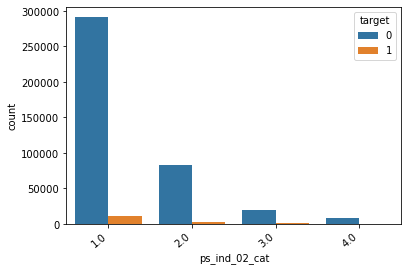

<Figure size 3600x3600 with 0 Axes>

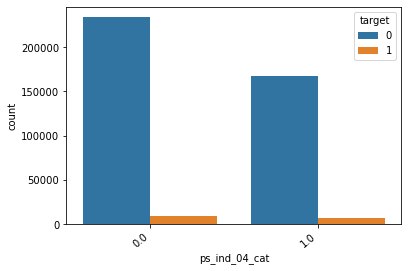

<Figure size 3600x3600 with 0 Axes>

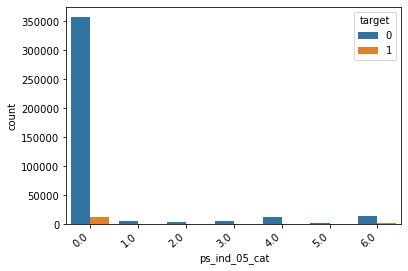

<Figure size 3600x3600 with 0 Axes>

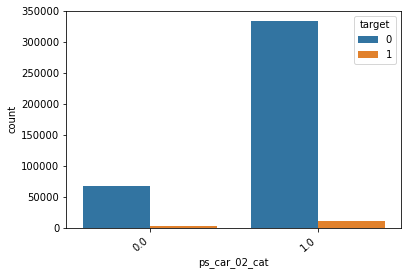

<Figure size 3600x3600 with 0 Axes>

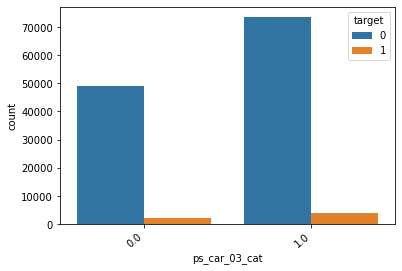

<Figure size 3600x3600 with 0 Axes>

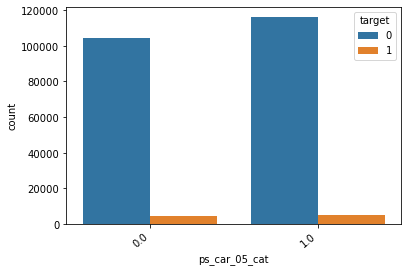

<Figure size 3600x3600 with 0 Axes>

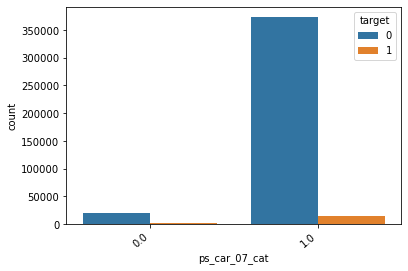

<Figure size 3600x3600 with 0 Axes>

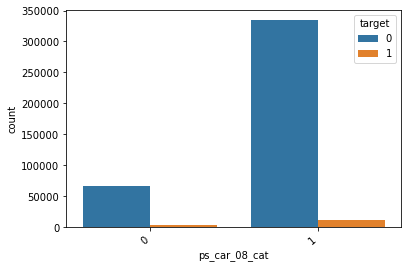

<Figure size 3600x3600 with 0 Axes>

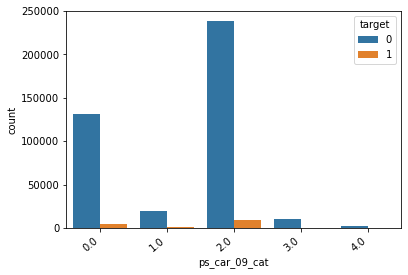

<Figure size 3600x3600 with 0 Axes>

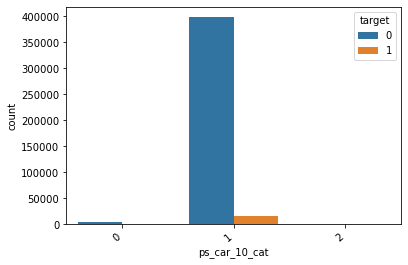

<Figure size 3600x3600 with 0 Axes>

In [21]:
# Visualizing columns having number of categories <= 8 
for i in col_nominal:
    n = len(train_data[i].unique())
    if(n<=8):

        ax = sns.countplot(x=i, hue="target", data=train_data)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.figure(figsize = (50,50))
        plt.show()

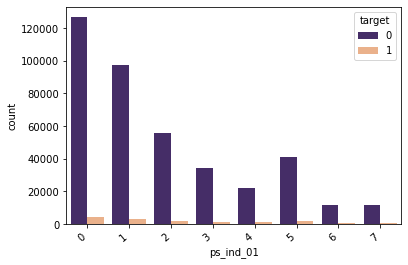

<Figure size 3600x3600 with 0 Axes>

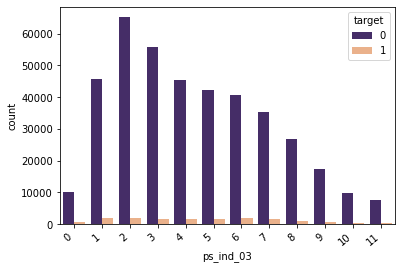

<Figure size 3600x3600 with 0 Axes>

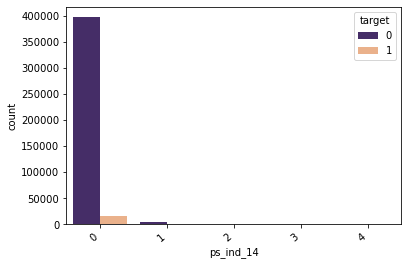

<Figure size 3600x3600 with 0 Axes>

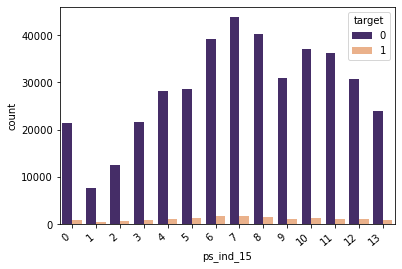

<Figure size 3600x3600 with 0 Axes>

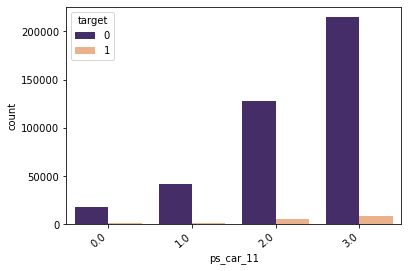

<Figure size 3600x3600 with 0 Axes>

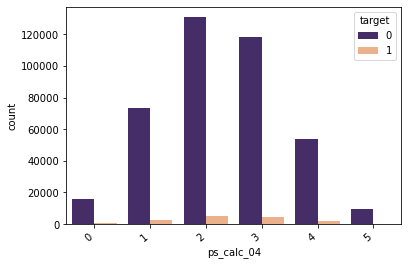

<Figure size 3600x3600 with 0 Axes>

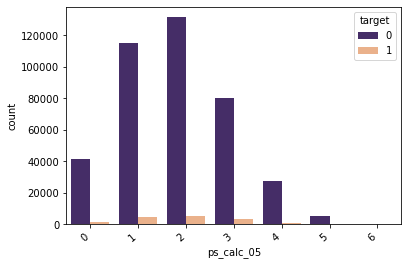

<Figure size 3600x3600 with 0 Axes>

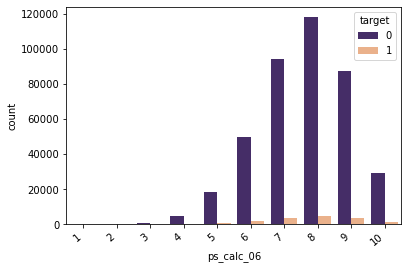

<Figure size 3600x3600 with 0 Axes>

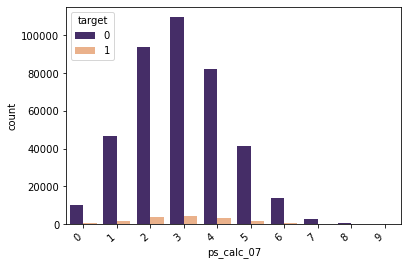

<Figure size 3600x3600 with 0 Axes>

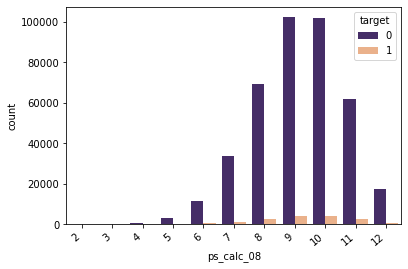

<Figure size 3600x3600 with 0 Axes>

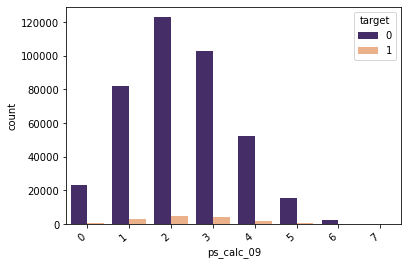

<Figure size 3600x3600 with 0 Axes>

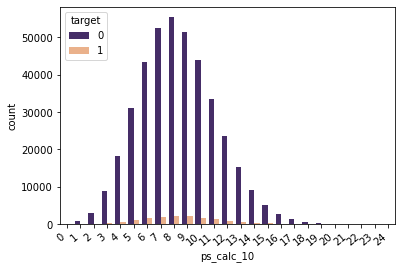

<Figure size 3600x3600 with 0 Axes>

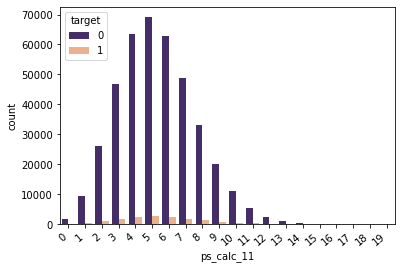

<Figure size 3600x3600 with 0 Axes>

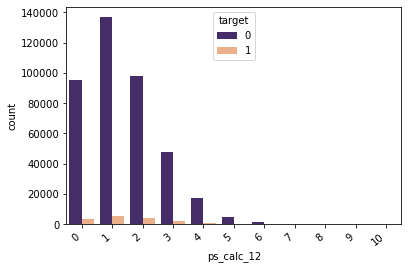

<Figure size 3600x3600 with 0 Axes>

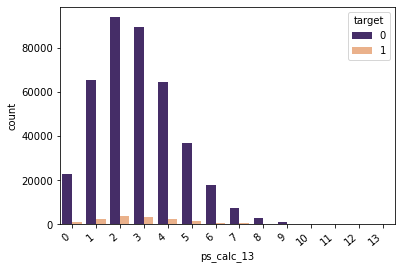

<Figure size 3600x3600 with 0 Axes>

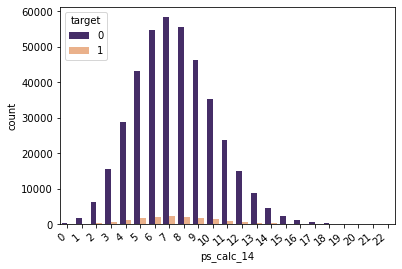

<Figure size 3600x3600 with 0 Axes>

In [22]:
# Visualizing ordinal features
for i in col_ordinal:
        n = len(train_data[i].unique())
        ax = sns.countplot(x=i, hue="target", data=train_data,palette=['#432371',"#FAAE7B"])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.figure(figsize = (50,50))
        plt.show()

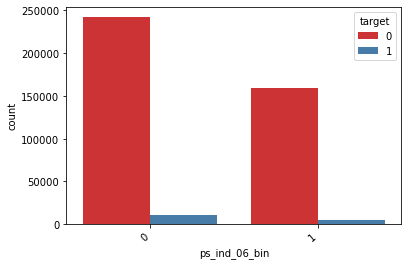

<Figure size 3600x3600 with 0 Axes>

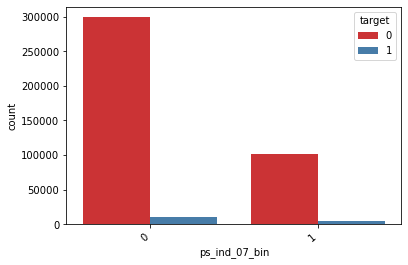

<Figure size 3600x3600 with 0 Axes>

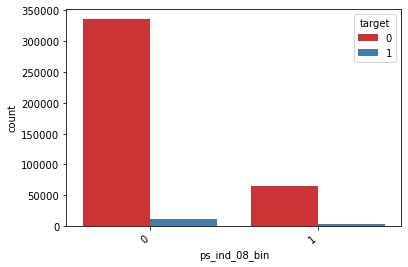

<Figure size 3600x3600 with 0 Axes>

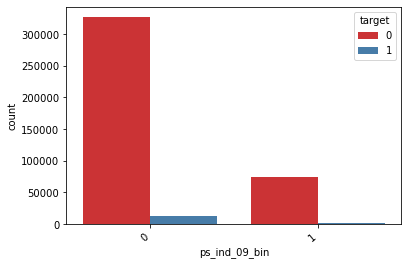

<Figure size 3600x3600 with 0 Axes>

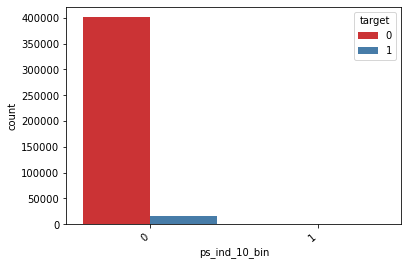

<Figure size 3600x3600 with 0 Axes>

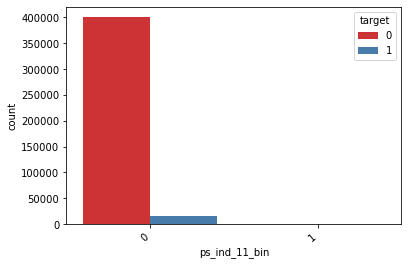

<Figure size 3600x3600 with 0 Axes>

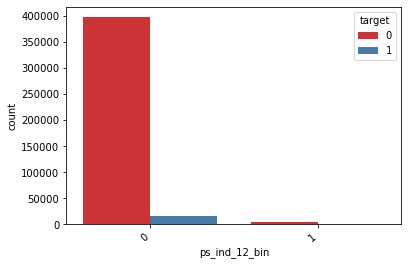

<Figure size 3600x3600 with 0 Axes>

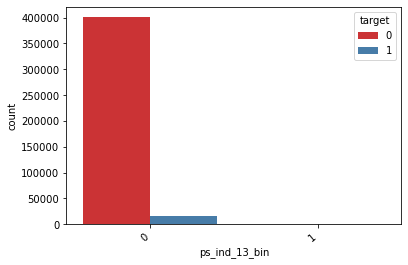

<Figure size 3600x3600 with 0 Axes>

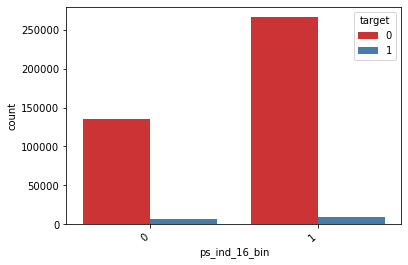

<Figure size 3600x3600 with 0 Axes>

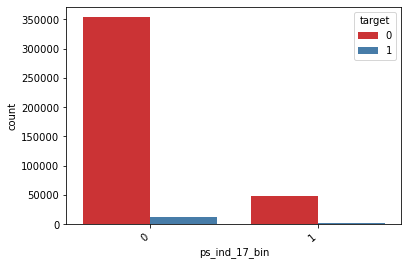

<Figure size 3600x3600 with 0 Axes>

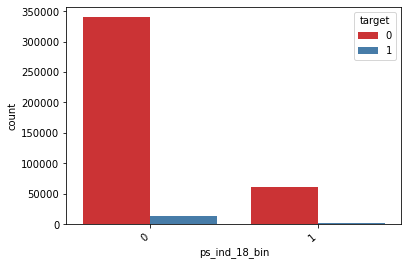

<Figure size 3600x3600 with 0 Axes>

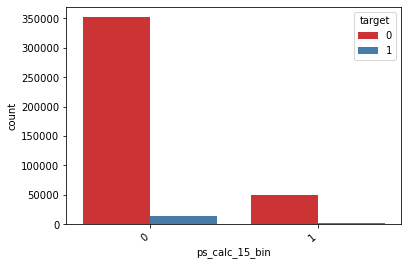

<Figure size 3600x3600 with 0 Axes>

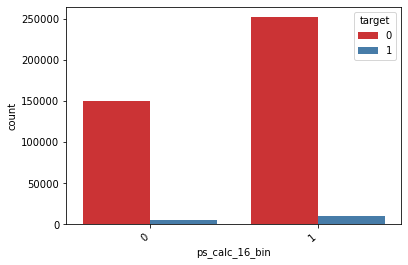

<Figure size 3600x3600 with 0 Axes>

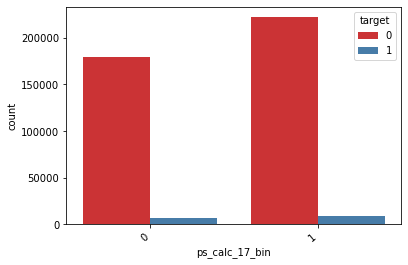

<Figure size 3600x3600 with 0 Axes>

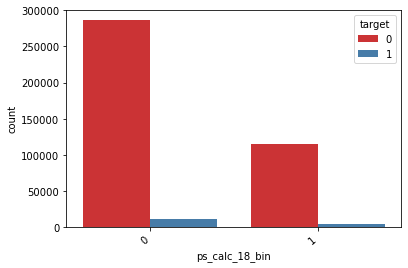

<Figure size 3600x3600 with 0 Axes>

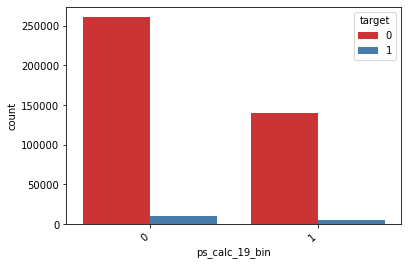

<Figure size 3600x3600 with 0 Axes>

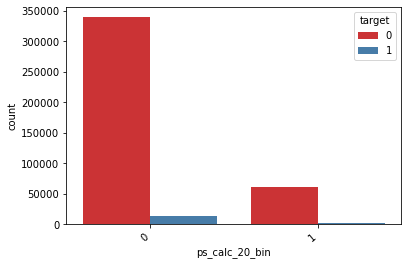

<Figure size 3600x3600 with 0 Axes>

In [23]:
# Visualizing binary features
for i in col_binary:
        n = len(train_data[i].unique())
        ax = sns.countplot(x=i, hue="target", data=train_data,palette="Set1")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.figure(figsize = (50,50))
        plt.show()

### Missing Values

#### Missing values in training set

In [24]:
total_train = train_data.isnull().sum().sort_values(ascending=False) 
percent_train = (train_data.isnull().sum()/train_data.isnull().count() * 100).sort_values(ascending=False)
missing_values_train = pd.concat([total_train, percent_train], axis=1, keys=['Total', 'Percent'])

In [25]:
missing_values_train.head(13)

,Total,Percent
ps_car_03_cat,288186,69.167739
ps_car_05_cat,186614,44.789367
ps_reg_03,75476,18.115052
ps_car_14,29822,7.157601
ps_car_07_cat,8095,1.942887
ps_ind_05_cat,4047,0.971324
ps_car_09_cat,389,0.093364
ps_ind_02_cat,148,0.035522
ps_car_01_cat,76,0.018241
ps_ind_04_cat,55,0.013201


We observe that ps_car_03_cat and ps_car_05_cat both have very large percentage of missing data(greater than 40%). We remove these features.

#### Missing values in Test data set

In [26]:
total_test = test_data.isnull().sum().sort_values(ascending=False) 
percent_test = (test_data.isnull().sum()/test_data.isnull().count() * 100).sort_values(ascending=False)
missing_values_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])

In [27]:
missing_values_test.head(14)

,Total,Percent
ps_car_03_cat,123045,68.908067
ps_car_05_cat,79937,44.766582
ps_reg_03,32296,18.086512
ps_car_14,12798,7.167178
ps_car_07_cat,3394,1.900719
ps_ind_05_cat,1762,0.986761
ps_car_09_cat,180,0.100804
ps_ind_02_cat,68,0.038082
ps_car_01_cat,31,0.017361
ps_ind_04_cat,28,0.015681


Let's see what type of features have missing values.

In [28]:
missing_features=np.array(missing_values_train.index,dtype=str)
missing_features=missing_features[2:12] # Names of the columns with missing values

In [29]:
train_data[missing_features].head()

,ps_reg_03,ps_car_14,ps_car_07_cat,ps_ind_05_cat,ps_car_09_cat,ps_ind_02_cat,ps_car_01_cat,ps_ind_04_cat,ps_car_02_cat,ps_car_11
0,0.722842,0.366742,1.0,0.0,0.0,1.0,6.0,1.0,1.0,2.0
1,NaN,0.404599,1.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0
2,1.133027,NaN,1.0,0.0,2.0,1.0,11.0,0.0,1.0,3.0
3,0.860596,0.368511,1.0,0.0,2.0,3.0,7.0,0.0,1.0,3.0
4,0.556215,0.379342,1.0,0.0,2.0,2.0,11.0,1.0,1.0,3.0


We observe that we have:
- Categorical missing features ( ending with 'cat' )
- Continous missing features ( features having numerical continous values - 'ps_reg_03','ps_car_14' )
- Ordinal missing feature ( which is neither continous nor categorical - 'ps_car_11' )

Let's see missing data in test set

In [30]:
missing_features_test=np.array(missing_values_test.index,dtype=str)
missing_features_test=missing_features_test[2:13] # Names of the columns with missing values

In [31]:
test_data[missing_features_test].head()

,ps_reg_03,ps_car_14,ps_car_07_cat,ps_ind_05_cat,ps_car_09_cat,ps_ind_02_cat,ps_car_01_cat,ps_ind_04_cat,ps_car_11,ps_car_02_cat,ps_car_12
0,NaN,0.418569,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.424264
1,0.508060,0.361248,1.0,0.0,2.0,3.0,3.0,1.0,3.0,1.0,0.315278
2,0.840387,0.361386,1.0,0.0,1.0,1.0,11.0,1.0,2.0,0.0,0.447214
3,0.724137,0.378814,1.0,0.0,2.0,2.0,7.0,0.0,3.0,1.0,0.374166
4,1.048809,0.429535,1.0,0.0,0.0,2.0,10.0,1.0,3.0,0.0,0.447214


We observe that we have:
- Categorical missing features ( ending with 'cat' )
- Continous missing features ( features having numerical continous values - 'ps_reg_03','ps_car_14','ps_car_12' )
- Ordinal missing feature ( which is neither continous nor categorical - 'ps_car_11' )

#### Filling Missing Data

In [32]:
train_data=train_data.drop(['ps_car_03_cat','ps_car_05_cat'],axis=1)
test_data=test_data.drop(['ps_car_03_cat','ps_car_05_cat'],axis=1)

In [33]:
print('Train data shape = ',train_data.shape)
print('Test data shape', test_data.shape)

Train data shape =  (416648, 57)
Test data shape (178564, 56)


Let's store the parameters on which we will train the model

In [34]:
training_parameters = list(test.columns)
training_parameters.remove('id')
training_parameters.remove('ps_car_03_cat')
training_parameters.remove('ps_car_05_cat')
for x in missing_features:
    training_parameters.remove(x)

#### We will predict the missing values as follows:-
- If the feature is continous, we will use Linear Regression.
- If the feature is categorical, we will use Logistic Regression.

The reason for prediction rather than imputation is that imputing artificial values results in poor accuracy.

In [35]:
from sklearn.linear_model import LogisticRegression,LinearRegression

In [36]:
for feature in missing_features:
    train_new = train_data[training_parameters+[feature]]
    idx = train_data.loc[pd.isna(train_data[feature]), :].index
    train_new = train_new.dropna()
    y_new = train_new[feature]
    train_new = train_new.drop([feature],axis=1)
    
    
    if features[feature] == 'interval':           #Check feature dictionary for data type
        model = LinearRegression(n_jobs=-1)
        model.fit(train_new,y_new)
        
        for i in idx:
            train_data[feature].loc[i] = model.predict(train_data[training_parameters].loc[i].values.reshape(1, -1))  #Predict and fill 
                                                                                                                      #the missing values
            
        if feature in missing_features_test:
            idx = test_data.loc[pd.isna(test_data[feature]), :].index   
            for i in idx:
                test_data[feature].loc[i] = model.predict(test_data[training_parameters].loc[i].values.reshape(1, -1)) 
            
    else:
        model = LogisticRegression(penalty='l2' , class_weight='balanced',n_jobs=-1)
        model = LogisticRegression(class_weight='balanced', n_jobs = -1)
        model.fit(train_new,y_new)
        
        for i in idx:
            train_data[feature].loc[i] = model.predict(train_data[training_parameters].loc[i].values.reshape(1, -1))  
        
        if feature in missing_features_test:
            idx = test_data.loc[pd.isna(test_data[feature]), :].index 
            for i in idx:
                test_data[feature].loc[i] = model.predict(test_data[training_parameters].loc[i].values.reshape(1, -1)) 

In [37]:
train_data.to_csv("train_without_mv.csv")
test_data.to_csv("test_without_mv.csv")

In [38]:
train_data = pd.read_csv('train_without_mv.csv')
test_data = pd.read_csv('test_without_mv.csv')

In [39]:
from sklearn.impute import SimpleImputer
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='mean')
test_data = pd.DataFrame(fill_NaN.fit_transform(test_data),columns = test_data.columns)

In [40]:
train_data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [41]:
test_data.isnull().sum()

id                0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0
ps_calc_14        0


Thus, we have successfully filled missing values!

#### Let's see what the target feature looks like

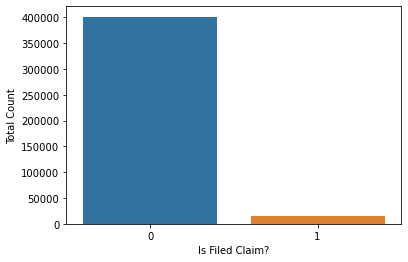

In [42]:
sns.countplot(train_data.target);
plt.xlabel('Is Filed Claim?');
plt.ylabel('Total Count');
plt.show()

In [43]:
imbalance = train_data['target'].value_counts()
print("% of People who claimed the insurance (Denoted by 1) = ", (imbalance[1]/train.shape[0])*100)
print("% of People who did not claim the insurance (Denoted by 0) =  ", (imbalance[0]/train.shape[0])*100)

% of People who claimed the insurance (Denoted by 1) =  3.653203663524126
% of People who did not claim the insurance (Denoted by 0) =   96.34679633647588


#### We see that there is a class imbalance problem present. We will handle this while building the model.

# Models

## Handling Imbalanced Data

We will first try to oversample data using SMOTE

In [49]:
del test_data['id']
del train_data['id']

In [50]:
X = train_data.iloc[:, 1:].values
Y = train_data['target']

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2020,n_jobs=-1)
x_new, y_new = sm.fit_sample(X,Y)
print ('Shape of oversampled data: {}'.format(x_new.shape))
print ('Shape of Y: {}'.format(y_new.shape))

Shape of oversampled data: (802854, 55)
Shape of Y: (802854,)


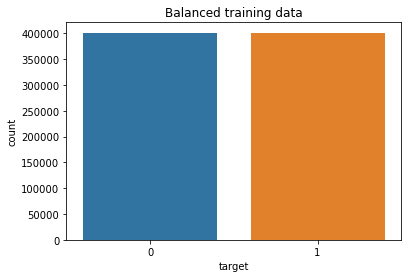

In [47]:
sns.countplot(y_new)
plt.title('Balanced training data')
plt.show()

In [48]:
temp = pd.read_csv('test_without_mv.csv')
test_id = temp['id'].values

#### Upon trying various models with smote, we came to a conclusion that SMOTE affects the accuracy of our model poorly! Hence, we dropped SMOTE!

### Logistic Regression

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 2020)

In [137]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 2020, penalty='l2')
classifier.fit(x_train, y_train)

LogisticRegression(random_state=2020)

In [138]:
y_pred = classifier.predict_proba(test_data)
submission = pd.DataFrame(columns=['id', 'target'])
submission['id'] = test_id
submission['target'] = y_pred[:, 1] 
submission.to_csv('submission_lr_without_smote.csv')
submission

,id,target
0,1225226,0.034734
1,487111,0.027593
2,1328243,0.111756
3,388051,0.023076
4,1454785,0.047463
...,...,...
178559,241164,0.018465
178560,720555,0.035805
178561,65816,0.029486
178562,538640,0.028697


The above gave a gini score of 0.21561 upon submission.

### SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state =86)
classifier.fit(x_train, y_train)

In [49]:
y_pred = classifier.predict_proba(test_data)
submission = pd.DataFrame(columns=['id', 'target'])
submission['id'] = test_id
submission['target'] = y_pred[:, 1] 
submission.to_csv('submission_svm_without_smote.csv')
submission

### Random Forest

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size = 0.25, random_state = 2020)

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1500, random_state = 2020, n_jobs=-1,
                                    max_depth=6, min_samples_split=120, min_samples_leaf=50)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=120,
                       n_estimators=1500, n_jobs=-1, random_state=2020)

In [52]:
y_pred = classifier.predict_proba(test_data)
submission = pd.DataFrame(columns=['id', 'target'])
submission['id'] = test_id
submission['target'] = y_pred[:, 1] 
submission.to_csv('submission_12_rf_without_smote.csv')
submission

,id,target
0,1225226,0.032928
1,487111,0.023564
2,1328243,0.057922
3,388051,0.025811
4,1454785,0.042453
...,...,...
178559,241164,0.028048
178560,720555,0.041827
178561,65816,0.031063
178562,538640,0.025976


The above gave a Gini score of 0.26178 upon submission.

### Decision Tree

In [53]:
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size = 0.25, random_state = 2020)

In [54]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 2020, max_depth=6,min_samples_split=70,min_samples_leaf=30)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=30,
                       min_samples_split=70, random_state=2020)

In [55]:
y_pred = classifier.predict_proba(test_data)
submission = pd.DataFrame(columns=['id', 'target'])
submission['id'] = test_id
submission['target'] = y_pred[:, 1] 
submission.to_csv('submission_12_dc_without_smote.csv')
submission

,id,target
0,1225226,0.026786
1,487111,0.022435
2,1328243,0.082988
3,388051,0.017504
4,1454785,0.040470
...,...,...
178559,241164,0.031626
178560,720555,0.053837
178561,65816,0.022435
178562,538640,0.021390


The above gave a Gini Score of 0.21730 upon submission.

### XGBoost

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2020)

In [63]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.01, n_estimators=1200, max_depth=6, gamma=0.7, subsample=0.8, colsample_bytree=0.3,
                           objective= 'binary:logistic', reg_alpha = 1,reg_lambda = 3,n_jobs=-1, seed=42)  
classifier.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.3, gamma=0.7, learning_rate=0.01, max_depth=6,
              n_estimators=1200, n_jobs=-1, reg_alpha=1, reg_lambda=3, seed=42,
              subsample=0.8)

In [64]:
y_pred = classifier.predict_proba(test_data.values)   #have to pass as nd-array, not as dataframe here to xgb
submission = pd.DataFrame(columns=['id', 'target'])
submission['id'] = test_id
submission['target'] = y_pred[:, 1] 
submission.to_csv('submission_10_xgb_without_smote_best.csv')
submission

,id,target
0,1225226,0.041448
1,487111,0.017627
2,1328243,0.084593
3,388051,0.021057
4,1454785,0.037417
...,...,...
178559,241164,0.023674
178560,720555,0.052448
178561,65816,0.018117
178562,538640,0.021304


### The above gave a Gini score of 0.29023 on submission, which is our final model.

In [56]:
from xgboost import XGBClassifier
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2020)
classifier = XGBClassifier(learning_rate=0.01, n_estimators=1400, max_depth=8, gamma=0.5, subsample=0.6, colsample_bytree=0.5,
                           objective= 'binary:logistic', reg_alpha = 2,reg_lambda = 2,n_jobs=-1, seed=86)  
classifier.fit(x_train, y_train)
y_pred = classifier.predict_proba(test_data.values)   #have to pass as nd-array, not as dataframe here to xgb
submission = pd.DataFrame(columns=['id', 'target'])
submission['id'] = test_id
submission['target'] = y_pred[:, 1] 
submission.to_csv('submission_7_xgb_without_smote.csv')
submission

,id,target
0,1225226,0.035866
1,487111,0.016353
2,1328243,0.112591
3,388051,0.020127
4,1454785,0.032101
...,...,...
178559,241164,0.019864
178560,720555,0.048138
178561,65816,0.015328
178562,538640,0.020184


The above gave a Gini score of 0.28615 on submission.

In [57]:
from xgboost import XGBClassifier
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2020)
classifier = XGBClassifier(learning_rate=0.01, n_estimators=1800, max_depth=10, gamma=0.7, subsample=0.7, colsample_bytree=0.7,
                           objective= 'binary:logistic', reg_alpha = 3,reg_lambda = 1,n_jobs=-1, seed=86)  
classifier.fit(x_train, y_train)
y_pred = classifier.predict_proba(test_data.values)   #have to pass as nd-array, not as dataframe here to xgb
submission = pd.DataFrame(columns=['id', 'target'])
submission['id'] = test_id
submission['target'] = y_pred[:, 1] 
submission.to_csv('submission_8_xgb_without_smote.csv')
submission

,id,target
0,1225226,0.051487
1,487111,0.016265
2,1328243,0.126898
3,388051,0.019527
4,1454785,0.030488
...,...,...
178559,241164,0.019462
178560,720555,0.039313
178561,65816,0.015937
178562,538640,0.015728


The above gave a Gini score of 0.26510 on submission.

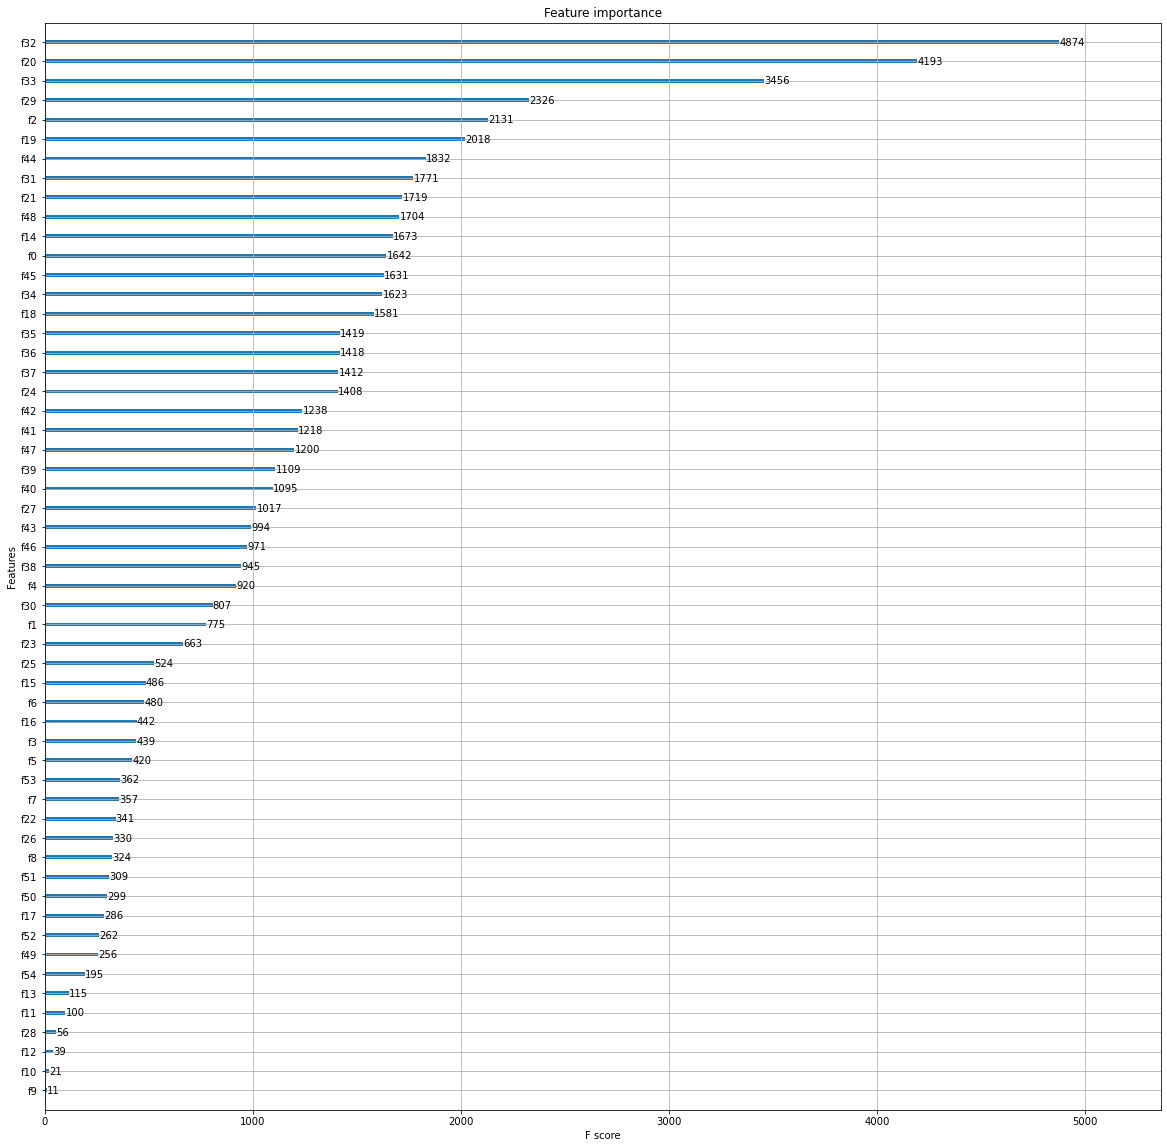

In [98]:
from xgboost import plot_importance
# plt.figure(figsize=(1,1))
ax = plot_importance(classifier)
# plt.rcParams["figure.figsize"] = (20,20)
plt.show()

### Simple Ensembling

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#### Max Voting

In [46]:
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 2000, max_depth=6,min_samples_split=70,min_samples_leaf=30)
model3 = GaussianNB()
model4 = RandomForestClassifier(n_estimators = 1500, random_state = 2020, n_jobs=-1,
                                    max_depth=6, min_samples_split=120, min_samples_leaf=50)

#### Weighted Averaging

##### Without SMOTE

In [52]:
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

0.9632111518596033

In [53]:
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.9632111518596033

In [54]:
model3.fit(x_train, y_train)
model3.score(x_test, y_test)

0.9040725024481097

In [55]:
model4.fit(x_train, y_train)
model4.score(x_test, y_test)

0.9632111518596033

In [56]:
pred1 = model1.predict_proba(test_data)
pred2 = model2.predict_proba(test_data)
pred3 = model3.predict_proba(test_data)
pred4 = model4.predict_proba(test_data)

weighted_prediction = ((pred1)**0.28+(pred2)**0.28+(pred3)**0.16+(pred4)**0.28)/4
weighted_prediction

array([[0.99299346, 0.39972038],
       [0.99480026, 0.31565559],
       [0.98161533, 0.46700971],
       ...,
       [0.99398285, 0.37618919],
       [0.99462501, 0.30902598],
       [0.99212162, 0.36703694]])

In [58]:
temp = pd.read_csv('test_without_mv.csv')
test_id = temp['id'].values
submission = pd.DataFrame(columns=['id', 'target'])
submission['id'] = test_id
submission['target'] = weighted_prediction[:, 1] 
submission.to_csv('submission_weighted_avg.csv', index=False, header =1)

In [59]:
submission['target'].mean()

0.4159489166572608

#### With Smote

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2020,n_jobs=-1)
x_new, y_new = sm.fit_sample(X,Y)
print ('Shape of oversampled data: {}'.format(x_new.shape))
print ('Shape of Y: {}'.format(y_new.shape))

Shape of oversampled data: (802854, 55)
Shape of Y: (802854,)


In [61]:
model1.fit(x_new, y_new)
model1.score(x_test, y_test)

0.6076112209827

In [62]:
model2.fit(x_new, y_new)
model2.score(x_test, y_test)

0.9632111518596033

In [63]:
model3.fit(x_new, y_new)
model3.score(x_test, y_test)

0.6128338549567021

In [64]:
model4.fit(x_new, y_new)
model4.score(x_test, y_test)

0.9507881953111499

In [66]:
pred1 = model1.predict_proba(test_data)
pred2 = model2.predict_proba(test_data)
pred3 = model3.predict_proba(test_data)
pred4 = model4.predict_proba(test_data)

weighted_prediction = (pred1)*0.16+(pred2)*0.35+(pred3)*0.16+(pred4)*0.33
labelprediction = np.argmax(weighted_prediction, axis = 1)
submission_w_avg_smote = pd.DataFrame(columns=['id', 'target'])
submission_w_avg_smote['id'] = test_id
submission_w_avg_smote['target'] = weighted_prediction[:, 1] 
submission_w_avg_smote.to_csv('submission_weighted_avg_smote.csv', index=False, header =1)
submission_w_avg_smote['target'].mean()

0.3142267931787275

#### Power Averaging Without Smote

In [67]:
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

0.9632111518596033

In [68]:
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.9632111518596033

In [69]:
model3.fit(x_train, y_train)
model3.score(x_test, y_test)

0.9040725024481097

In [70]:
model4.fit(x_train, y_train)
model4.score(x_test, y_test)

0.9632111518596033

In [71]:
pred1 = model1.predict_proba(test_data)
pred2 = model2.predict_proba(test_data)
pred3 = model3.predict_proba(test_data)
pred4 = model4.predict_proba(test_data)

powered_prediction = ((pred1**2)+(pred2**2)+(pred3**2)+(pred4**2))/4
submission_p = pd.DataFrame(columns=['id', 'target'])
submission_p['id'] = test_id
submission_p['target'] = powered_prediction[:, 1] 
submission_p.to_csv('submission_powered_avg.csv', index=False, header =1)
submission_p['target'].mean()

0.01568632403419214